In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
import matplotlib as plt
y=pd.read_csv('labels.csv')
y1=pd.read_csv('labels.csv')
y1 = y1.dropna()
y1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 1 to 4933
Data columns (total 7 columns):
gene       2467 non-null object
TCA        2467 non-null float64
Resp       2467 non-null float64
Ribo       2467 non-null float64
Proteas    2467 non-null float64
Hist       2467 non-null float64
HTH        2467 non-null float64
dtypes: float64(6), object(1)
memory usage: 154.2+ KB


In [3]:
with open('data.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split("\t") for line in stripped if line)
    with open('data1.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        #writer.writerow(('title', 'intro'))
        writer.writerows(lines)

In [96]:
from sklearn.model_selection import train_test_split
x=pd.read_csv('data1.csv', delimiter = ',')
a=x.select_dtypes(include=['float64']).copy()
x_train, x_test = train_test_split(x,test_size=0.25, random_state = 0)
x1=x_train.select_dtypes(include=['object']).copy()
x1_1=x_test.select_dtypes(include=['object']).copy()


In [55]:
#categorical features excluded
x2=x_train.select_dtypes(include=['float64']).copy()
x2_2=x_test.select_dtypes(include=['float64']).copy()
#x2.info()
X2=x2.iloc[:,:].values
X1=x1.iloc[:,:].values
print(X2.shape)
print(X1.shape)

(1850, 79)
(1850, 2)


In [56]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = np.nan, strategy = 'mean', axis=0)
imputer = imputer.fit(X2)
X2=imputer.transform(X2)


/afs/inf.ed.ac.uk/user/s18/s1885624/miniconda3/envs/dme/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [57]:
from sklearn import random_projection
transformer = random_projection.GaussianRandomProjection(n_components=10)
X2DR=transformer.fit_transform(X2)
print(X2DR.shape)

(1850, 10)


In [72]:
#create the reduced dataframe
array = np.concatenate((X1,X2DR),axis=1)
columns_new = ['ORF','NAME','E1','E2','E3','E4','E5','E6','E7','E8','E9','E10']
X_red=pd.DataFrame(array,columns=columns_new)

convert_dict = {'E1':float,
               'E2':float,
               'E3':float,
               'E4':float,
               'E5':float,
               'E6':float,
               'E7':float,
               'E8':float,
               'E9':float,
               'E10':float,
              }
X_red = X_red.astype(convert_dict)


IndexError: index 10 is out of bounds for axis 0 with size 10

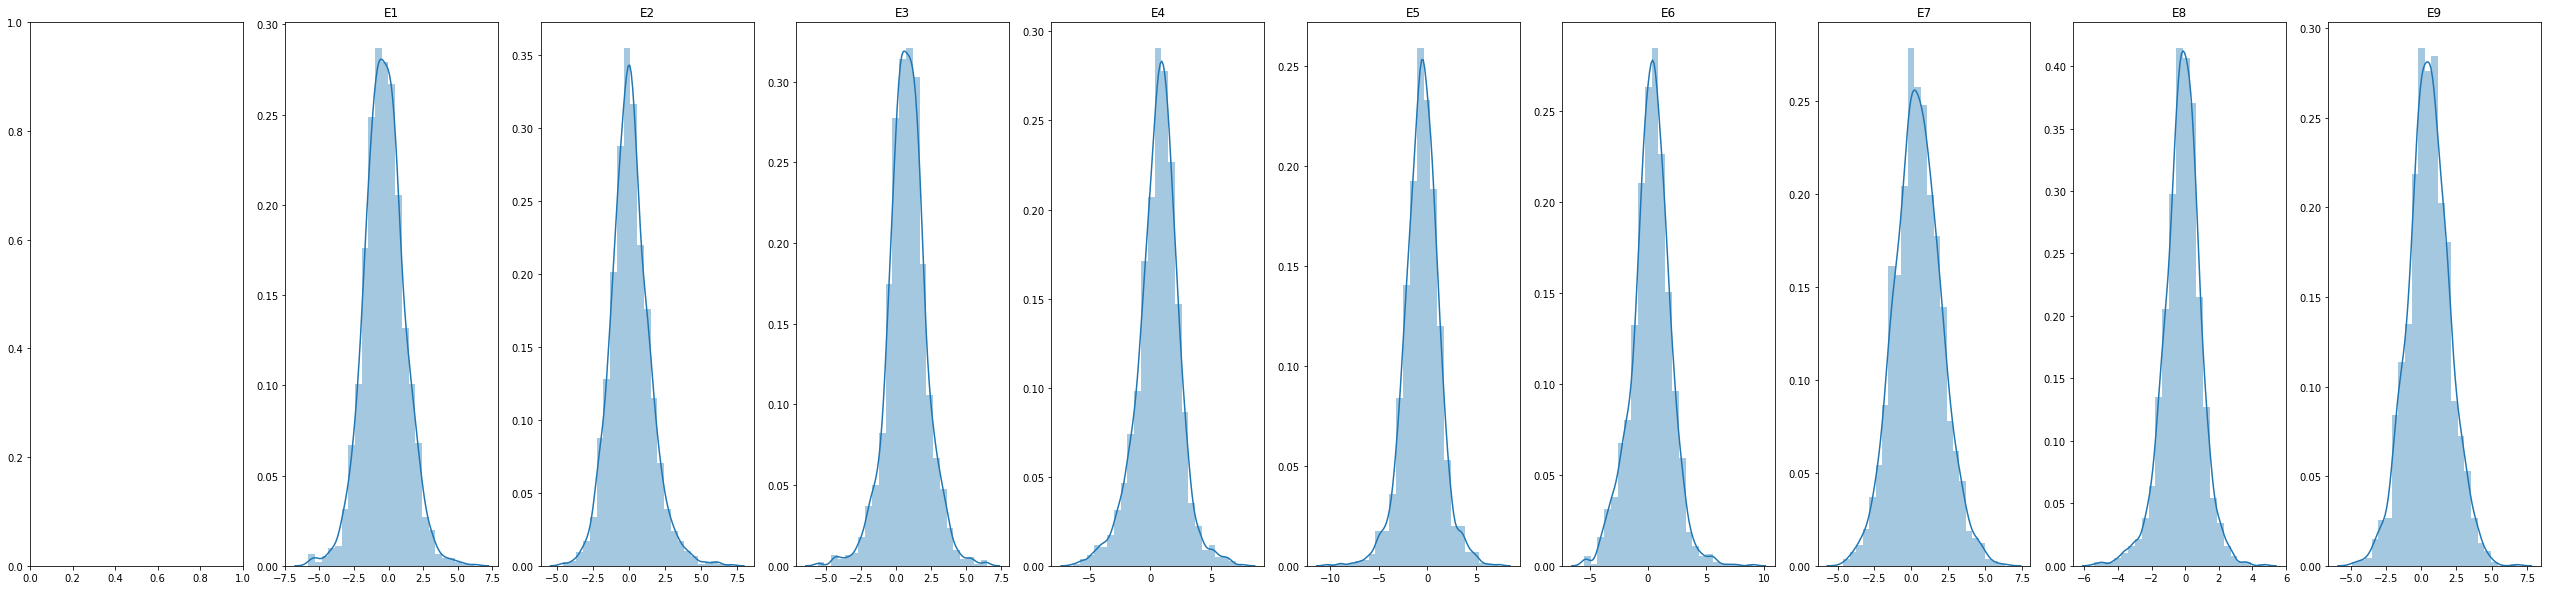

In [91]:
#Visualising after dimension reduction
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,10,figsize=(45,10))
for i in range(1,11):
    variable_name=['E' + str(i)]
    sns.distplot(X_red[variable_name].values.reshape(-1),ax=ax[i], kde= True, bins=25)
    ax[i].set_title('E{}'.format(i))
ax[0].set_ylabel('Distribution of Experimental Values')
fig.tight_layout()
plt.show()

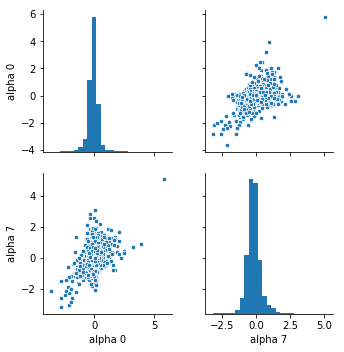

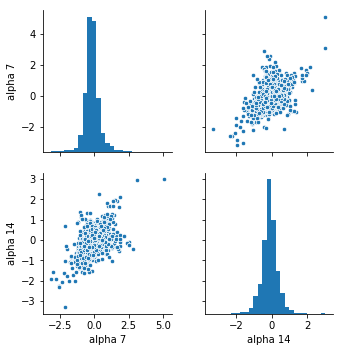

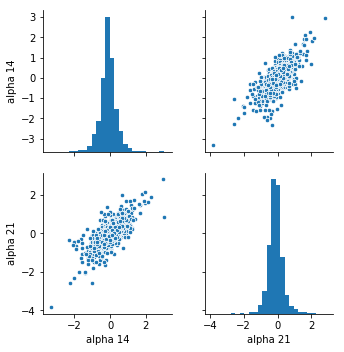

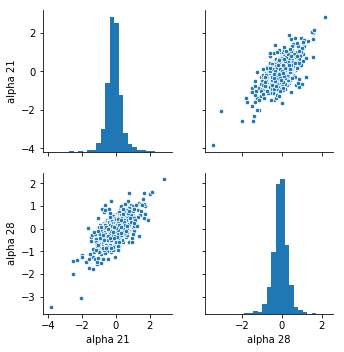

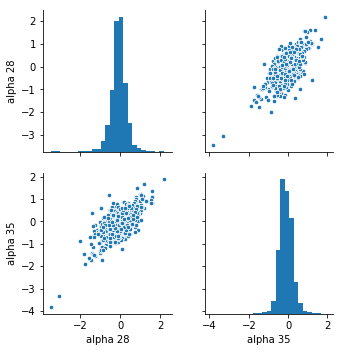

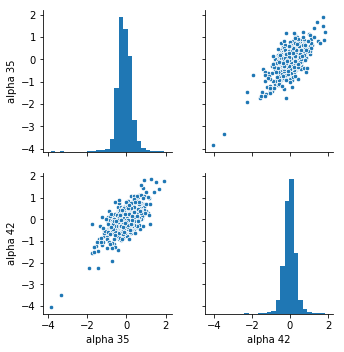

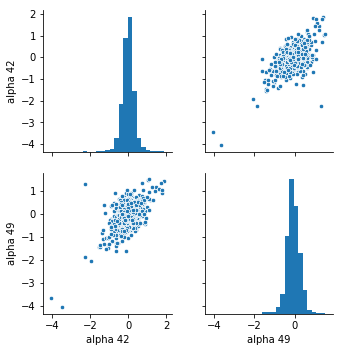

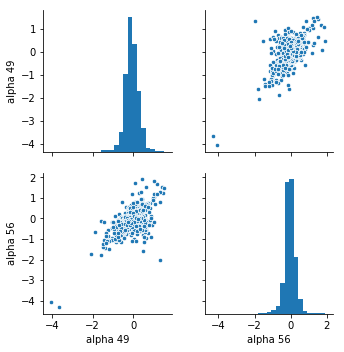

In [109]:
for i in range(0,50,7):
    sns.pairplot(x, vars = ["alpha "+str(i), "alpha "+str(i+7)], plot_kws={'s' : 20}, diag_kws={'bins': 25})
    plt.show()
#for i in range(10,170,i):
#   sns.pairplot(x, vars = ["heat "+str(i), "heat "+str(i+i)], plot_kws={'s' : 20}, diag_kws={'bins': 25})
#   plt.show()
    
